# 利用python进行数据分析

McKinney著  
机械工业出版社  
2014年1月第1版  

本书代码及数据集下载地址：[GitHub - wesm/pydata-book: Materials and IPython notebooks for "Python for Data Analysis" by Wes McKinney, published by O'Reilly Media](https://github.com/wesm/pydata-book)

gitbook地址：[README - 利用Python进行数据分析·第2版](https://seancheney.gitbook.io/python-for-data-analysis-2nd/)

## 第2章 引言

### 0. 数据准备

In [33]:
import os
import json

usaDataFile = open(os.path.join(os.path.dirname(os.getcwd()),'files', 'example.txt'))
records = [json.loads(line) for line in usaDataFile]

In [8]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### 1. 普通方法

In [9]:
timeZones = [rec['tz'] for rec in records if 'tz' in rec]

In [28]:
# 方法1
def getCount(sequence):
    count = {}
    for x in sequence:
        if x in count:
            count[x] += 1
        else:
            count[x] = 1
    return count

# 方法2
def getCount2(sequence):
    count = {}
    for x in sequence:
        count.setdefault(x, 0)
        count[x] += 1
    return count

# 方法3
from collections import defaultdict
def getCount3(sequence):
    count = defaultdict(int)
    for x in sequence:
        count[x] += 1
    return count

In [29]:
from collections import Counter
count = Counter(timeZones)
count.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 2. pandas

In [30]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

frame = DataFrame(records)

In [32]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [35]:
frame['tz'].value_counts()[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [43]:
cleanTz = frame['tz'].fillna('Missing')
cleanTz[cleanTz==''] = 'Unkown'
tzCounts = cleanTz.value_counts()
tzCounts[:10]

America/New_York       1251
Unkown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

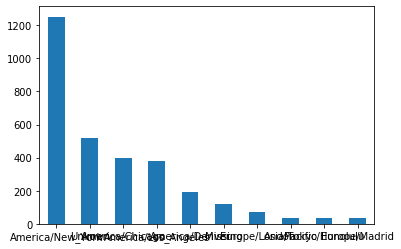

In [47]:
tzCounts[:10].plot(kind='bar', rot=0)

In [41]:
frame['tz'][:15]

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                        
8                        
9                        
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                    NaN
14       America/New_York
Name: tz, dtype: object

In [52]:
result = Series([x.split()[0] for x in frame.a.dropna()])
result[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

result.value_counts()[:10]

## 第4章 numpy基础：数组和矢量计算

### 1. 创建ndarray

In [59]:
data1 = [[1,2,3],[4,5,6]]
arr1 = np.array(data1)
arr1.shape

(2, 3)

三个属性：dtype，ndim，shape

In [67]:
arr1.ndim

2

### 2. 构造特殊数组：

zeros，ones，empty。它们的参数是元祖。

In [72]:
arr0 = np.zeros((3,4))
arr0

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [73]:
arr1 = np.ones((2,5))
arr1

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [75]:
arrNull = np.empty((3,2))
arrNull

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [81]:
arr00 = np.zeros_like(arr1)
arr00

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [77]:
arr11 = np.ones_like(arr0)
arr11

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [82]:
arrNN = np.empty_like(arr0)
arrNN

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [83]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [84]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### 3. range

numpy版本的range

In [71]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 4. 数组类型

In [86]:
arr = np.array([1,2,3], dtype=np.float64)
arr.dtype

dtype('float64')

In [88]:
arr2 = arr.astype(np.int64)
arr2.dtype

dtype('int64')

In [89]:
arr.dtype

dtype('float64')

astype转换数据类型，但是只是为了得到转换值，原数组的数据类型并不发生变化。

### 5. 索引切片

In [91]:
intArray = np.arange(10)
intArray

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
intArray.astype(arr.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [99]:
arrSlice = intArray[5:8]
arrSlice[:] = 12
arrSlice[1] = 12345
intArray

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

逗号隔开的索引列表：`arr[x,y] `    
相当于`arr[x][y]`

In [104]:
arr2d = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
arr2d[2,1]

8

In [108]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [107]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

#### 布尔索引

In [118]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)

In [119]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [120]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [121]:
data

array([[-1.09673982,  0.95049843,  0.24587609, -0.02940574],
       [ 1.12330511,  0.08324102,  1.10630376, -1.39940121],
       [-0.66077489, -1.03319192,  0.45566864,  1.27117305],
       [ 1.09873868, -0.26371798,  0.80832969,  1.01064736],
       [ 1.13688777, -0.67478584, -0.31381624, -2.31985389],
       [-0.11547831,  1.15204944,  0.3923327 , -1.28613316],
       [-0.04594325,  0.22542307,  1.76579658,  0.13369561]])

In [123]:
data[names=='Bob', 2:]

array([[ 0.24587609, -0.02940574],
       [ 0.80832969,  1.01064736]])

#### 花式索引

In [125]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i

In [126]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

数组作为索引，所以看上去是嵌套中括号`[[]]`

In [130]:
arr[[4,3]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.]])

和刚才的比较

In [131]:
arr[4,3]

4.0

In [132]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [133]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [134]:
arr[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [135]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

### 6. 转置

In [136]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [137]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [138]:
arr = np.random.randn(6,3)
arr

array([[-0.61806876,  0.48870519, -0.79509407],
       [-0.32255052, -0.74401861, -2.21325398],
       [-0.10015062, -0.01976404, -0.29608565],
       [-0.05430725, -1.08335785,  0.35727591],
       [ 1.81425465, -0.59225425,  2.03189678],
       [-0.49680785,  1.17946441, -0.28818402]])

In [139]:
np.dot(arr.T, arr)

array([[ 4.03736523, -1.66172346,  5.04510978],
       [-1.66172346,  3.70835271, -0.66637255],
       [ 5.04510978, -0.66637255,  9.95763509]])

In [140]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [141]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [142]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

### 7. 元素级数组函数

In [145]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [146]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [147]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [148]:
x = np.random.randn(8)
y = np.random.randn(8)

In [149]:
x

array([-2.43610247, -0.18039623, -1.17164285,  0.28196808, -0.2988161 ,
       -0.46488926,  0.56018742,  1.15823397])

In [150]:
y

array([-1.0647281 ,  0.0292376 , -0.20856766, -2.57644783,  0.08738737,
       -1.06261733,  0.10518682, -0.292854  ])

In [151]:
np.maximum(x, y)

array([-1.0647281 ,  0.0292376 , -0.20856766,  0.28196808,  0.08738737,
       -0.46488926,  0.56018742,  1.15823397])

In [152]:
arr = np.random.randn(7) * 5
arr

array([ 0.75275518, -6.02066841, -9.39878345, -0.98866793,  2.203432  ,
        9.84941008,  5.86854399])

In [153]:
np.modf(arr)

(array([ 0.75275518, -0.02066841, -0.39878345, -0.98866793,  0.203432  ,
         0.84941008,  0.86854399]), array([ 0., -6., -9., -0.,  2.,  9.,  5.]))

In [156]:
arr = np.random.random(7) *3
arr

array([2.13355192, 0.26545847, 2.07253107, 2.46158195, 1.30654702,
       2.44454012, 1.77104792])

In [157]:
np.square(arr)

array([4.5520438 , 0.0704682 , 4.29538505, 6.05938568, 1.70706513,
       5.97577641, 3.13661074])